# Resizing and Cropping Image Files for Training Data
### We are going to read image files in from a directory, resize and cut them down to a specific size, and then write them to another directory.

In [9]:
import cv2
import os

### The following cell is the only code that needs to be edited when it is used.
 * *imgDir* is the filepath to the directory of unprocessed images. **Make sure this directory only contains image files. This code may crash and will almost certainly give undesired results otherwise.**
 * *resizedDir* is the filepath to the directory that you want the processed images to be written to. **This Directory Must Already Exist.**
 * *desiredNumRows* is the desired height, in pixels, of the processed images
 * *desiredNumCols* is the desired width, in pixels, of the processed images

In [10]:
imgDir = '/path/to/files/'
resizedDir = '/path/to/processed/files/'
desiredNumRows =  # height
desiredNumCols =  # width

#### The following function scales an image so that it can later be cut to the right dimensions.

In [11]:
def resizeImage(targRows, targCols, image):
    rows = 0
    cols = 0

    if image.shape[0]/image.shape[1] > targRows/targCols:
        cols = targCols
        rows = int(image.shape[0] * cols/image.shape[1])
    else:
        rows = targRows
        cols = int(image.shape[1] * rows/image.shape[0])

    return cv2.resize(image, (cols, rows), interpolation = cv2.INTER_AREA)


#### The following function cuts a resized image so it has the correct dimensions.

In [12]:
def cutImage(targRows, targCols, resized):
    rowIndices = [int((resized.shape[0]-targRows)/2), int((resized.shape[0] + targRows)/2)]
    colIndices = [int((resized.shape[1] - targCols)/2), int((resized.shape[1] + targCols)/2)]
    
    return resized[rowIndices[0]:rowIndices[1], colIndices[0]:colIndices[1]]


### As an example, we will resize and cut one image. We read in the first image file from our directory of unprocessed images, put together its filepath, and create a numpy array of the image.

In [13]:
from PIL import Image
exampleImg = os.listdir(imgDir)[0]
examplePath = os.path.join(imgDir, exampleImg)
initImage = cv2.imread(examplePath, cv2.IMREAD_UNCHANGED)

#Display image
img = Image.fromarray(cv2.cvtColor(initImage, cv2.COLOR_BGR2RGB), 'RGB')
display(img)
print("This image is ", initImage.shape[0], " x ", initImage.shape[1])

This image is  20  x  56


### Next, we resize the image so the smaller of its dimensions matches the respective dimension that we want the processed version to have. This will allow us to cut the other dimension down so the image is the right size later.

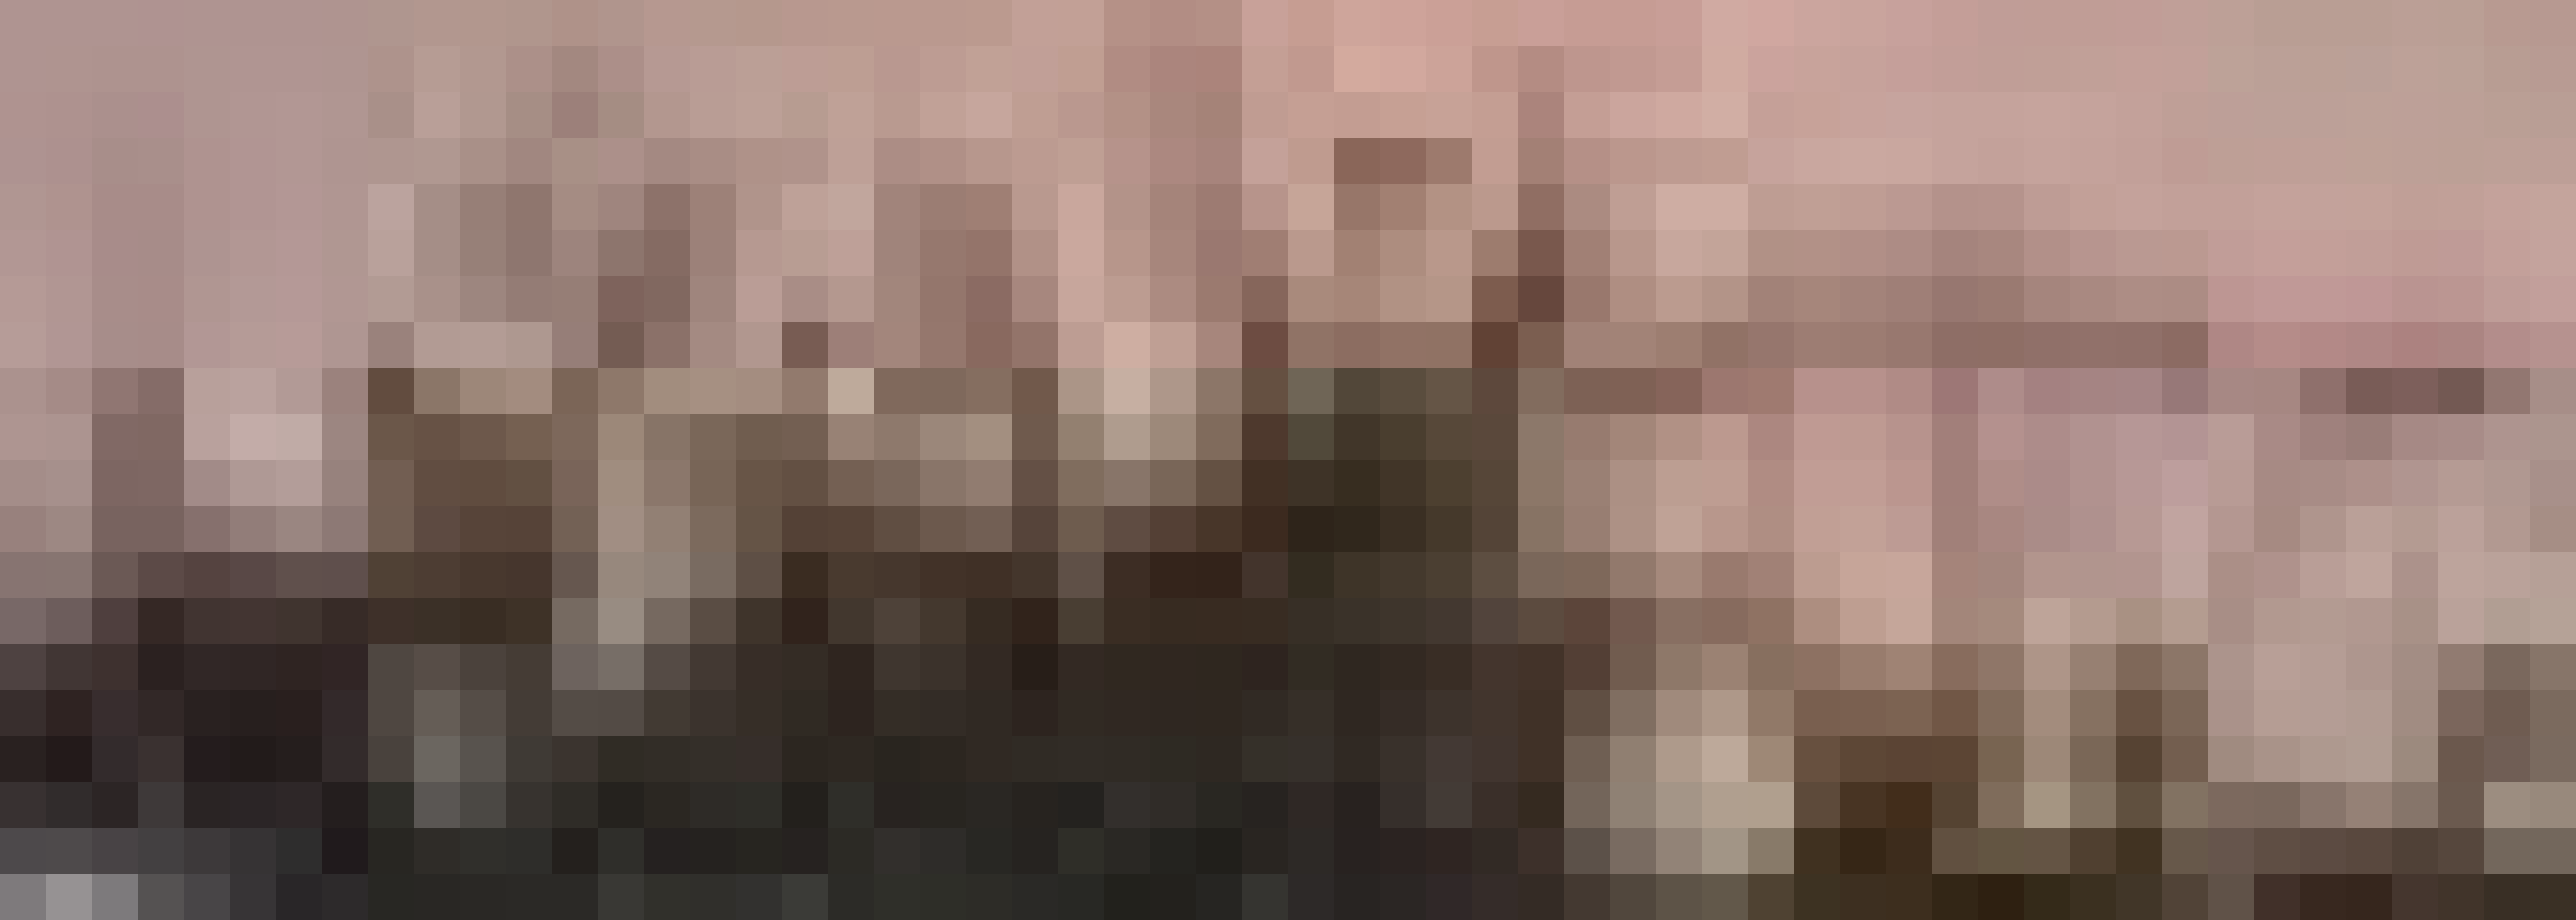

This image is  1000  x  2800


In [14]:
resizedExample = resizeImage(desiredNumRows, desiredNumCols, initImage)
img = Image.fromarray(cv2.cvtColor(resizedExample, cv2.COLOR_BGR2RGB), 'RGB')
display(img)
print("This image is ", resizedExample.shape[0], " x ", resizedExample.shape[1])

### Finally, we cut the longer dimension down so the image has the correct size.

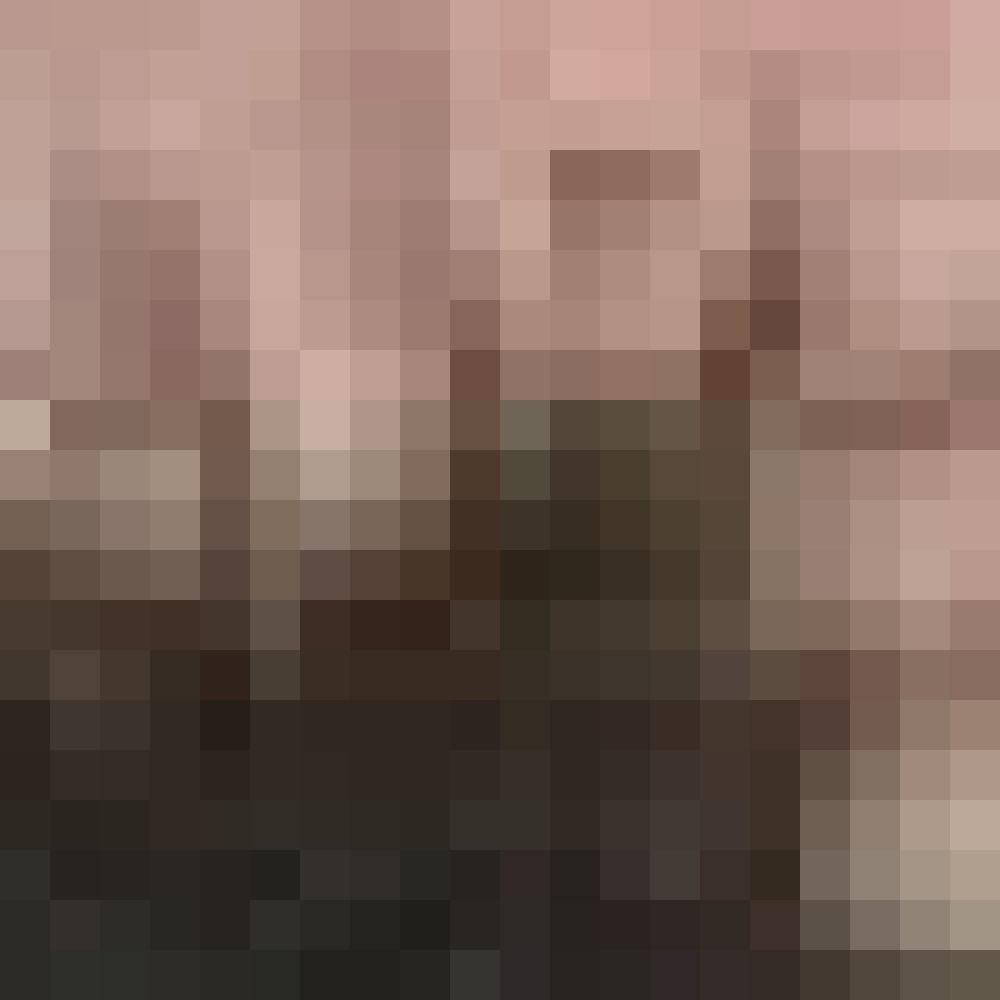

This image is  1000  x  1000


In [15]:
cutExample = cutImage(desiredNumRows, desiredNumCols, resizedExample)
img = Image.fromarray(cv2.cvtColor(cutExample, cv2.COLOR_BGR2RGB), 'RGB')
display(img)
print("This image is ", cutExample.shape[0], " x ", cutExample.shape[1])

### From here, we would write the file to the directory of processed images.

## Actually processing all the images in our directory:
Loop through the files in the directory of unprocessed images. Resize and crop them, and then write them to the directory of processed images.

In [16]:
for file in os.listdir(imgDir):
    filePath = os.path.join(imgDir, file)
    image = cv2.imread(filePath, cv2.IMREAD_UNCHANGED)
    
    resizedImg = resizeImage(desiredNumRows, desiredNumCols, image)
    
    resizedImg = cutImage(desiredNumRows, desiredNumCols, resizedImg)
    
    cv2.imwrite(os.path.join(resizedDir , file), resizedImg)


## Now the cut, resized images will be in your directory for processed images.